# **PERDIDOS EN EL ESPACIO**

## IMPORTACIÓN DE LIBRERIAS

In [169]:
# Importación de las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px
from faker import Faker
faker = Faker()
import sklearn as sk
print("Setup complete")

Setup complete


## CREACIÓN DE LOS PLANETAS

In [170]:
class Planeta:
    def __init__(self, nombre, g):
        self.nombre = nombre
        self.g = g
        self.id = faker.unique.random_number(digits=1) # Generar ID numérico único.
planetas_dict = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas = [] # Planetas

for nombre, g in planetas_dict.items(): # Carga de planetas
    planetas.append(Planeta(nombre, g))


print("Planetas cargados")
for i in range(len(planetas)):
    print(planetas[i].nombre, planetas[i].g, planetas[i].id)

Planetas cargados
Tierra 9.8 2
Marte 3.7 4
Jupiter 24.8 8
Saturno 9.0 9
Urano 8.7 6
Neptuno 11.0 3


## RESOLUCIÓN DE LOS EJERCICIOS

### Planteo de las ecuaciones

In [171]:
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    t_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    dg_dL = 2 / (tiempo**2) #Derivada parcial g respecto l
    dg_dt = (-4 * longitud) / (tiempo**3) #Derivada parcial g respecto t

    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2)
    return g_calculado, g_error

In [172]:
def planeta_esperado(g_calculado, g_error):
    for planeta in planetas:
        if g_calculado - g_error <= planeta.g and planeta.g <= g_calculado + g_error:
            return planeta
    return None

### Ejercicios propuestos

In [173]:
experimento_a = simulacion(1, 0.46)
print("Experimento A")
print(f"- Gravedad calculada: {round(experimento_a[0],3)} \n- Error calculado: {round(experimento_a[1],3)} ")
experimento_b = simulacion(2, 0.66)
print('Experimento B')
print(f"- Gravedad calculada: {round(experimento_b[0],3)} \n- Error calculado: {round(experimento_b[1],3)} ")

Experimento A
- Gravedad calculada: 9.452 
- Error calculado: 0.422 
Experimento B
- Gravedad calculada: 9.183 
- Error calculado: 0.282 


In [174]:
resultado_a = planeta_esperado(experimento_a[0], experimento_a[1])
resultado_b = planeta_esperado(experimento_b[0], experimento_b[1])
if resultado_a is None or resultado_b is None:
    print("No se pudo determinar el planeta en el que se encuentra la nave.")
else:
    if resultado_b == resultado_a:
        print("El planeta en el que se encuentra la nave se trata de ", experimento_a.nombre)
    else:
        planetas_probables = []
        planetas_probables.append(resultado_a.nombre)
        planetas_probables.append(resultado_b.nombre)
        print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
        for planeta in planetas_probables:
            print('  -', planeta)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


In [175]:
df = pd.DataFrame(columns=['longitud', 'tiempo', 'gravedad', 'error', 'planeta', 'id_planeta'])
df.loc[0] = [1, 0.46, experimento_a[0], experimento_a[1], planeta_esperado(experimento_a[0], experimento_a[1]).nombre, planeta_esperado(experimento_a[0], experimento_a[1]).id]
df.loc[1] = [2, 0.66, experimento_b[0], experimento_b[1], planeta_esperado(experimento_b[0], experimento_b[1]).nombre, planeta_esperado(experimento_b[0], experimento_b[1]).id]
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1,0.46,9.451796,0.421677,Tierra,2
1,2,0.66,9.182736,0.282027,Saturno,9


## CÁLCULO DE MÁS LONGUITUDES Y TIEMPOS

In [176]:
# CÁLCULO DE LA RECTA
m =(df['longitud'][1] - df['longitud'][0] )/ (df['tiempo'][1] - df['tiempo'][0])
n = df['longitud'][0] - m * df['tiempo'][0]

In [177]:
x_values = [random.uniform(0.46, 0.66) for _ in range(100)]
y_values = [m*x + n + random.gauss(0, 0.05) for x in x_values] # y = mx + n + error, el errr 

df_puntos = pd.DataFrame({'tiempo': x_values, 'longitud': y_values})
df_puntos = df_puntos[(df_puntos['tiempo'] >= 0.46) & (df_puntos['tiempo'] <= 0.66)].reset_index(drop=True)



df = pd.concat([df, df_puntos], ignore_index=True)

df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,2.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.931848,0.648894,NaN,NaN,NaN,NaN
3,0.933330,0.465303,NaN,NaN,NaN,NaN
4,1.366887,0.529747,NaN,NaN,NaN,NaN


In [178]:
df.head(100)

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,2.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.931848,0.648894,NaN,NaN,NaN,NaN
3,0.933330,0.465303,NaN,NaN,NaN,NaN
4,1.366887,0.529747,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,1.137899,0.498845,NaN,NaN,NaN,NaN
96,1.312116,0.506886,NaN,NaN,NaN,NaN
97,1.227840,0.522865,NaN,NaN,NaN,NaN
98,0.942030,0.466350,NaN,NaN,NaN,NaN


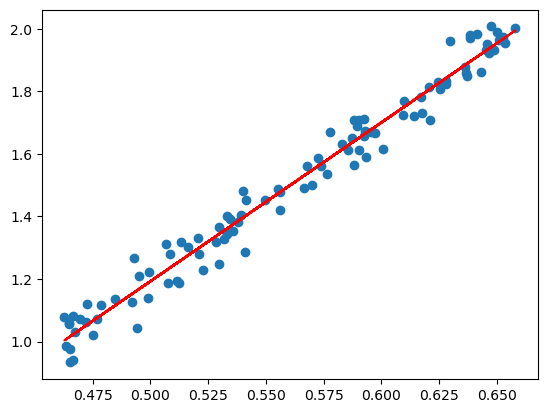

In [179]:
# Ajustar una recta de regresión lineal
m, n = np.polyfit(x_values, y_values, 1)

# Graficar los datos y la recta de regresión
plt.scatter(x_values, y_values)
plt.plot(x_values, m*np.array(x_values) + n, color='red')
plt.show()

In [180]:
df.dtypes

longitud      float64
tiempo        float64
gravedad      float64
error         float64
planeta        object
id_planeta    float64
dtype: object

In [181]:
round(df.describe(), 4)

,longitud,tiempo,gravedad,error,id_planeta
count,102.0000,102.0000,2.0000,2.0000,2.0000
mean,1.5017,0.5609,9.3173,0.3519,5.5000
std,0.3192,0.0622,0.1903,0.0987,4.9497
min,0.9333,0.4600,9.1827,0.2820,2.0000
25%,1.2325,0.5091,9.2500,0.3169,3.7500
50%,1.4966,0.5670,9.3173,0.3519,5.5000
75%,1.7590,0.6175,9.3845,0.3868,7.2500
max,2.0074,0.6600,9.4518,0.4217,9.0000


In [182]:
df['longitud'] = df['longitud'].astype(float)
df['tiempo'] = df['tiempo'].astype(float)

In [183]:
df = df.drop_duplicates()


In [184]:
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,2.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.931848,0.648894,NaN,NaN,NaN,NaN
3,0.933330,0.465303,NaN,NaN,NaN,NaN
4,1.366887,0.529747,NaN,NaN,NaN,NaN


## CÁCULO DE LA GRAVEDAD

In [185]:
g_calculado = []
g_error = []
for i in range(len(df)):
    g = simulacion(df['longitud'][i], df['tiempo'][i])
    g_calculado.append(g[0])
    g_error.append(g[1])
df['gravedad'] = g_calculado
df['error'] = g_error


In [186]:
df.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,2.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.931848,0.648894,9.176053,0.286782,NaN,NaN
3,0.933330,0.465303,8.621706,0.381924,NaN,NaN
4,1.366887,0.529747,9.741500,0.374621,NaN,NaN


In [187]:
df.to_csv('data/datos_faker.csv', index=False)

In [188]:
df_1 = df.copy()

## POSIBLE PLANETA

In [189]:
for i in range(len(df_1)):
    planeta = planeta_esperado(df_1['gravedad'][i], df_1['error'][i])
    if planeta is None:
        df_1.loc[i, 'planeta'] = None
        df_1.loc[i, 'id_planeta'] = None
    else:
        df_1.loc[i, 'planeta'] = planeta.nombre
        df_1.loc[i, 'id_planeta'] = planeta.id


In [190]:
df_1.head()

,longitud,tiempo,gravedad,error,planeta,id_planeta
0,1.000000,0.460000,9.451796,0.421677,Tierra,2.0
1,2.000000,0.660000,9.182736,0.282027,Saturno,9.0
2,1.931848,0.648894,9.176053,0.286782,Saturno,9.0
3,0.933330,0.465303,8.621706,0.381924,Saturno,9.0
4,1.366887,0.529747,9.741500,0.374621,Tierra,2.0


In [191]:
df_1.value_counts('planeta')

planeta
Tierra     48
Saturno    40
Urano       1
dtype: int64

In [192]:
df_2 = df_1.copy()

## COMPROBACIÓN DEL DATASET

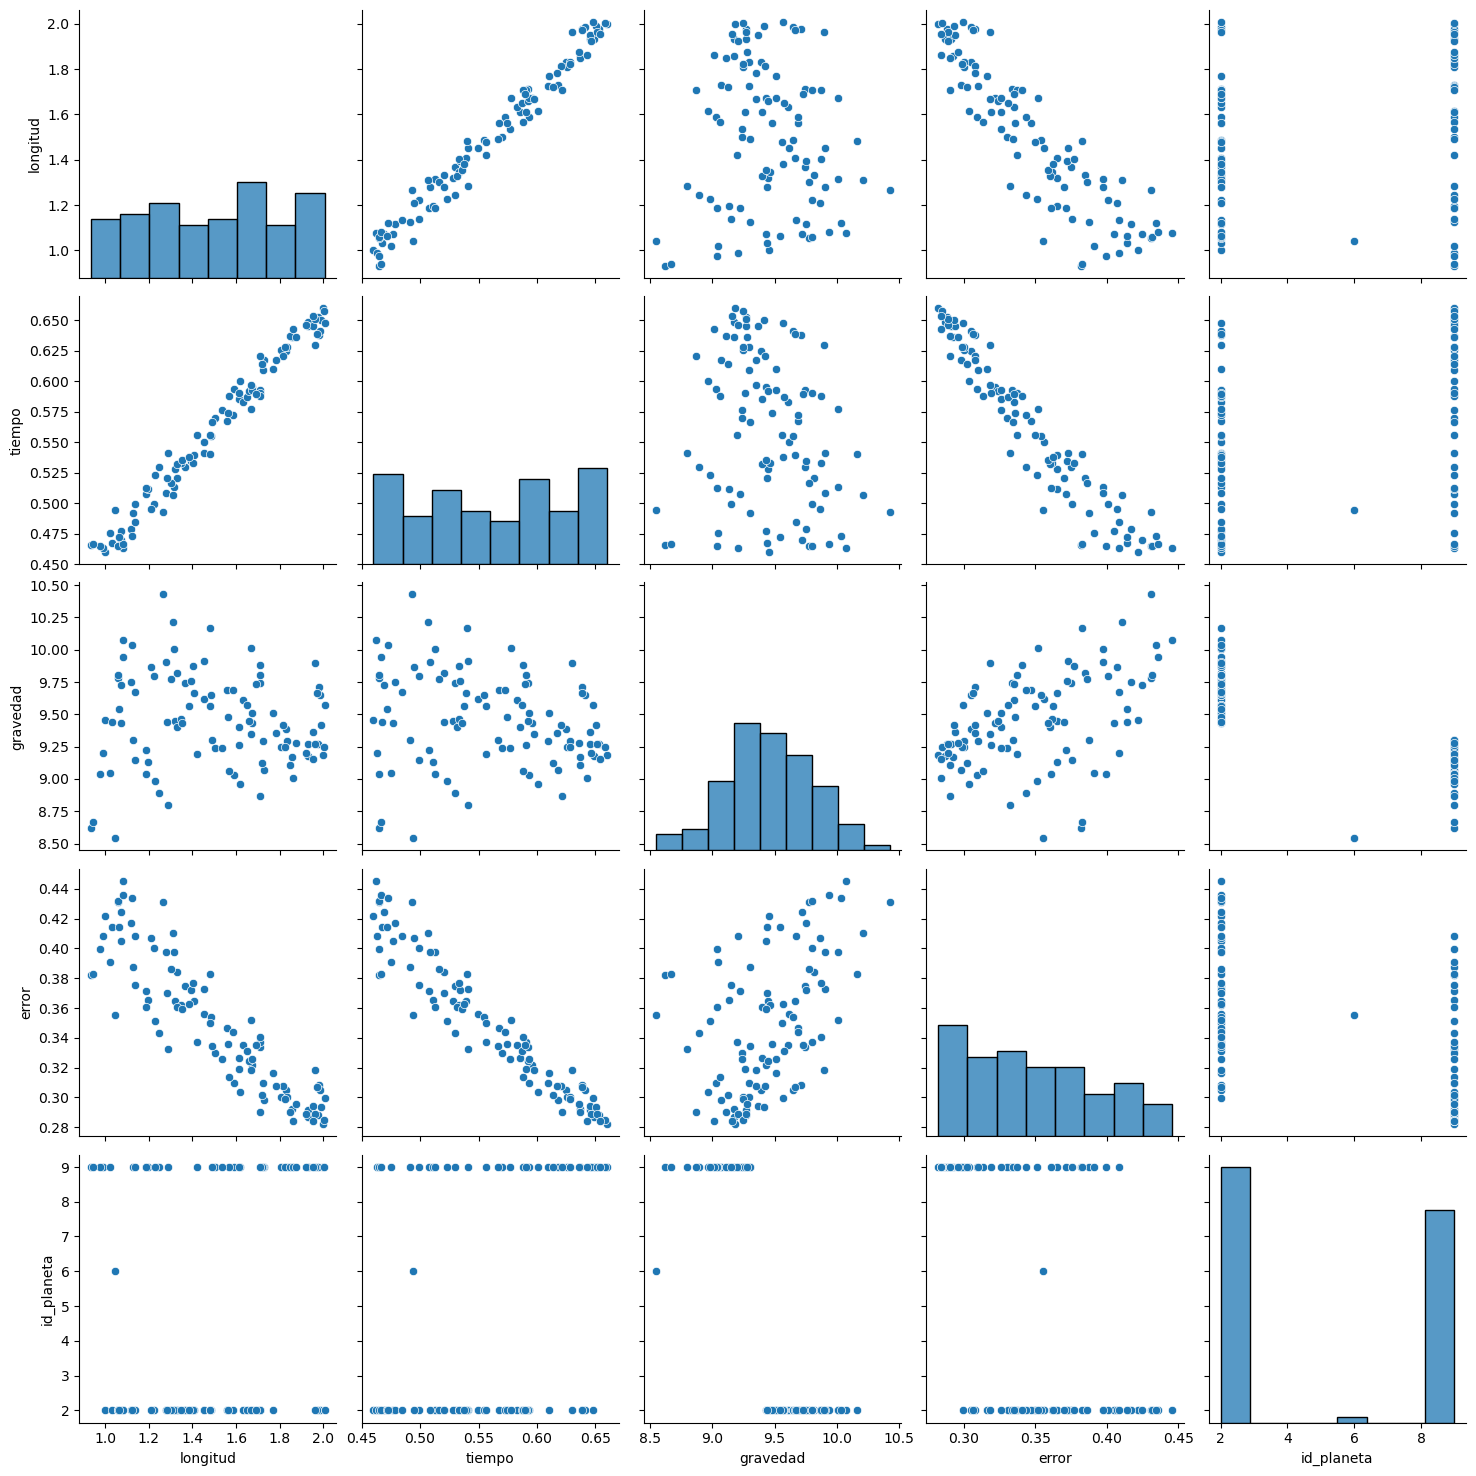

In [196]:
# Visualizamos las relaciones de cada par de variables existentes en el conjunto de datos
sns.pairplot(data=df_2, height=3)
plt.show()